In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/dataset/manually_coded.csv')
#df1 = pd.read_csv('/content/drive/MyDrive/dataset/Gemini output 2 with postprocessing.csv')

In [ ]:
columns_to_check = ['Hero', 'Villain', 'Victim', 'Beneficiary', 'Ally', 'Opponent', 'Ineffective', 'Setting', 'Plot', 'Moral', 'Belief System', 'Narrative Strategy']

word_check_1 = 'explicitly mentioned'
word_check_2 = 'implied'

# Define the function
def word_checker(word_to_check):
    global counter1
    counter1 = 0  # Reset counter each time the function is called
    for col in columns_to_check:
        print(f"Checking column: {col}")
        for index, cell in df1[col].dropna().items():
            cell_str = str(cell)  # Ensure the cell is treated as a string
            if word_to_check in cell_str.lower():
                print(f"Row {index} in column {col}: {cell_str}")
                counter1 += 1
    print(f"Number of cells containing {word_to_check}: {counter1}")

# Example usage
word_checker(word_check_1)
word_checker(word_check_2)


Checking column: Hero
Checking column: Villain
Checking column: Victim
Checking column: Beneficiary
Checking column: Ally
Checking column: Opponent
Checking column: Ineffective
Checking column: Setting
Checking column: Plot
Checking column: Moral
Checking column: Belief System
Checking column: Narrative Strategy
Number of cells containing explicitly mentioned: 0
Checking column: Hero
Checking column: Villain
Checking column: Victim
Checking column: Beneficiary
Checking column: Ally
Checking column: Opponent
Checking column: Ineffective
Checking column: Setting
Checking column: Plot
Checking column: Moral
Checking column: Belief System
Checking column: Narrative Strategy
Number of cells containing implied: 0


In [ ]:
import pandas as pd
import re

columns_to_check = ['Hero', 'Villain', 'Victim', 'Beneficiary', 'Ally', 'Opponent', 'Ineffective', 'Setting', 'Plot', 'Moral', 'Belief System', 'Narrative Strategy']

# Define a function to replace the text case-insensitively and count changes
def replace_none_explicitly_mentioned_and_count(df, columns):
    change_counter = 0

    def replace_none_explicitly_mentioned(cell):
        nonlocal change_counter
        cell_str = str(cell)  # Ensure the cell is treated as a string
        # Regex pattern to match variations of "None explicitly mentioned" and "Not explicitly mentioned" and "implied"
        pattern = re.compile(r'(none\s*explicitly\s*mentioned|not\s*explicitly\s*mentioned|no\s*explicitly\s*mentioned|\s*implied)', re.IGNORECASE)
        if pattern.search(cell_str):
            change_counter += 1
            return '0'
        return cell

    df[columns] = df[columns].applymap(replace_none_explicitly_mentioned)
    return df, change_counter

# Apply the function to the DataFrame and get the change count
df1, change_counter = replace_none_explicitly_mentioned_and_count(df1, columns_to_check)

# Print the number of changes made
print(f"Number of changes made: {change_counter}")


Number of changes made: 104


In [ ]:

def calculate_narrativity_index(df, columns):
  df['Narrativity Index'] = '0'
  for index, row in df.iterrows():
    non_zero_count = 0
    for col in columns:
      if row[col] != '0':
        non_zero_count += 1
    df.loc[index, 'Narrativity Index'] = non_zero_count / len(columns)

calculate_narrativity_index(df1, columns_to_check)

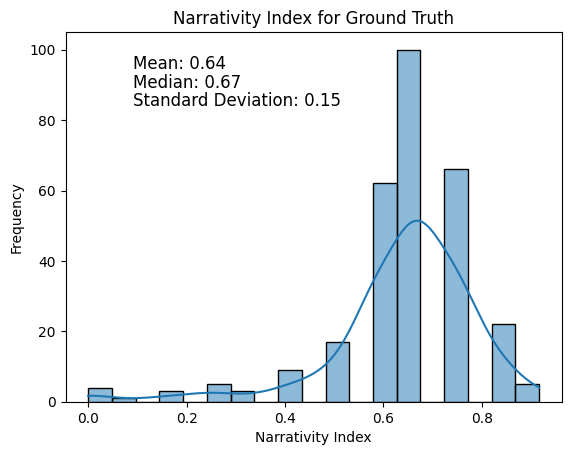

In [ ]:
# Create a distribution of the WordCount column
sns.histplot(df1['Narrativity Index'], kde=True)

# Calculate stats
mean = df1['Narrativity Index'].mean()
median = df1['Narrativity Index'].median()
std = df1['Narrativity Index'].std()

x_multiplier = 0.1

# Print the stats on the top right of the graph
plt.text(df1['Narrativity Index'].max() * x_multiplier, plt.gca().get_ylim()[1] * 0.9, f'Mean: {mean:.2f}', fontsize=12)
plt.text(df1['Narrativity Index'].max() * x_multiplier, plt.gca().get_ylim()[1] * 0.85, f'Median: {median:.2f}', fontsize=12)
plt.text(df1['Narrativity Index'].max() * x_multiplier, plt.gca().get_ylim()[1] * 0.8, f'Standard Deviation: {std:.2f}', fontsize=12)

plt.xlabel("Narrativity Index")
plt.ylabel("Frequency")
plt.title("Narrativity Index for Ground Truth")
# Show the plot
plt.show()

Standardized for WordCount

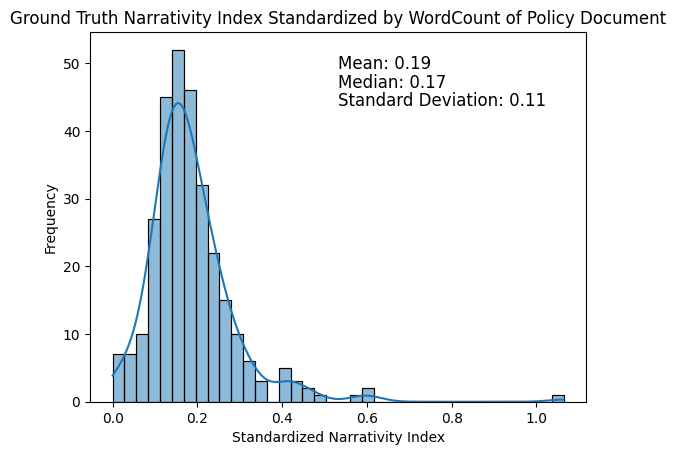

In [ ]:
# Define a function to count words in a string
def count_words(text):
    if pd.isna(text):
        return 0
    return len(text.split())

# Apply the function to the 'Body' column
df1['WordCount'] = df1['Body'].apply(count_words)
# Function to calculate the narrativity index standardized by WordCount
def calculate_standardized_narrativity_index(df, columns):
    df['Narrativity Index'] = 0.0
    for index, row in df.iterrows():
        non_zero_count = 0
        for col in columns:
            if row[col] != '0':
                non_zero_count += 1
        if row['WordCount'] > 0:
            df.loc[index, 'Narrativity Index'] = (non_zero_count / 12)*100 / row['WordCount']
        else:
            df.loc[index, 'Narrativity Index'] = 0.0  # Handle cases with zero WordCount

calculate_standardized_narrativity_index(df1, columns_to_check)


# Create a distribution of the Narrativity Index
sns.histplot(df1['Narrativity Index'], kde=True)

# Calculate stats
mean = df1['Narrativity Index'].mean()
median = df1['Narrativity Index'].median()
std = df1['Narrativity Index'].std()

# Print the stats on the top right of the graph
plt.text(df1['Narrativity Index'].max() * 0.5, plt.gca().get_ylim()[1] * 0.9, f'Mean: {mean:.2f}', fontsize=12)
plt.text(df1['Narrativity Index'].max() * 0.5, plt.gca().get_ylim()[1] * 0.85, f'Median: {median:.2f}', fontsize=12)
plt.text(df1['Narrativity Index'].max() * 0.5, plt.gca().get_ylim()[1] * 0.8, f'Standard Deviation: {std:.2f}', fontsize=12)
plt.xlabel("Standardized Narrativity Index")
plt.ylabel("Frequency")
plt.title("Ground Truth Narrativity Index Standardized by WordCount of Policy Document")
# Show the plot
plt.show()

,Column,Non-zero values,Zero values,Proportion (Zero/Non-zero)
0,Hero,264,33,0.125000
1,Villain,205,92,0.448780
2,Victim,118,179,1.516949
3,Beneficiary,40,257,6.425000
4,Ally,189,108,0.571429
5,Opponent,38,259,6.815789
6,Ineffective,22,275,12.500000
7,Setting,292,5,0.017123
8,Plot,278,19,0.068345
9,Moral,292,5,0.017123


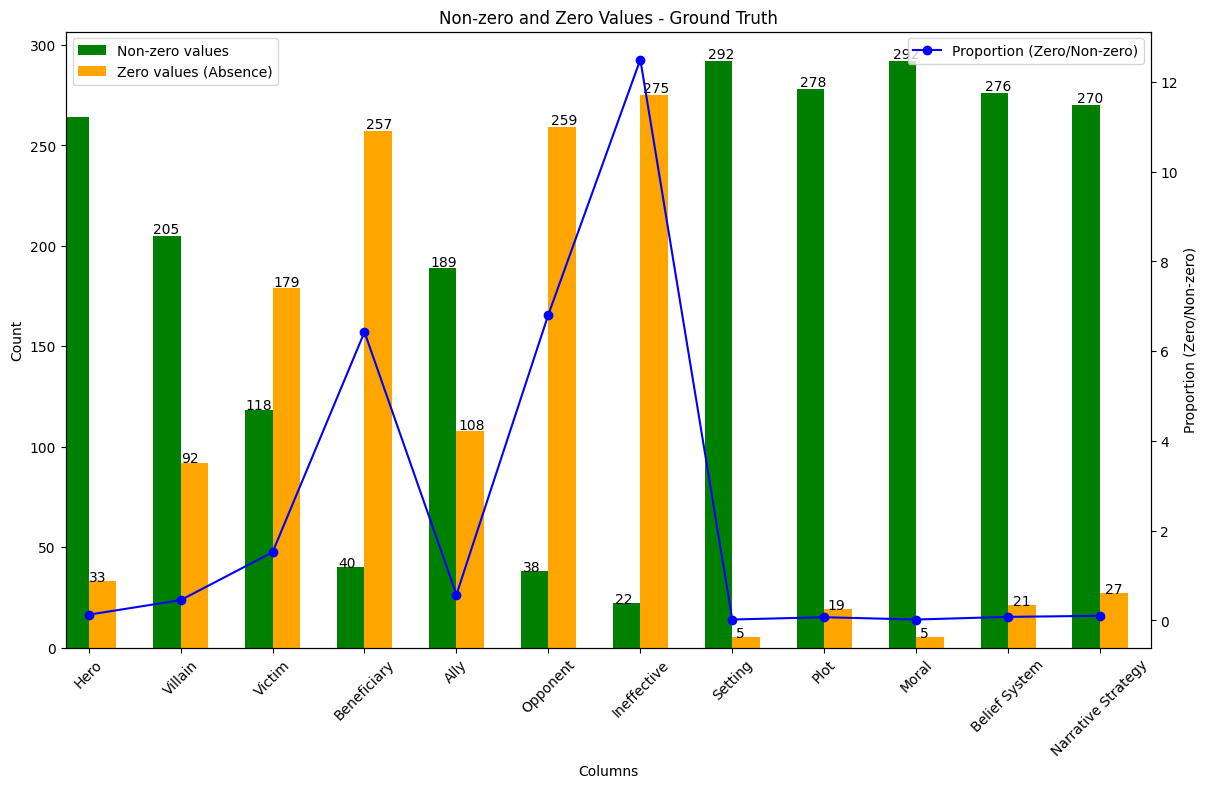

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame and columns_to_check is defined
columns_to_check = ['Hero', 'Villain', 'Victim', 'Beneficiary', 'Ally', 'Opponent', 'Ineffective', 'Setting', 'Plot', 'Moral', 'Belief System', 'Narrative Strategy']

# Function to calculate and plot the required statistics
def calculate_and_plot(df, columns):
    data = {'Column': [], 'Non-zero values': [], 'Zero values': [], 'Proportion (Zero/Non-zero)': []}

    for col in columns:
        non_zero_count = (df[col] != '0').sum()
        zero_count = (df[col] == '0').sum()
        proportion = zero_count / non_zero_count if non_zero_count != 0 else 0

        data['Column'].append(col)
        data['Non-zero values'].append(non_zero_count)
        data['Zero values'].append(zero_count)
        data['Proportion (Zero/Non-zero)'].append(proportion)

    df_stats = pd.DataFrame(data)
    display(df_stats)

    # Plotting the data
    fig, ax1 = plt.subplots(figsize=(14, 8))

    ax2 = ax1.twinx()

    width = 0.3
    df_stats.plot(kind='bar', x='Column', y='Non-zero values', ax=ax1, width=width, position=1, color='g', legend=False)
    df_stats.plot(kind='bar', x='Column', y='Zero values', ax=ax1, width=width, position=0, color='orange', legend=False)
    df_stats.plot(kind='line', x='Column', y='Proportion (Zero/Non-zero)', ax=ax2, color='b', marker='o', legend=False)

    ax1.set_ylabel('Count')
    ax2.set_ylabel('Proportion (Zero/Non-zero)')
    ax1.set_xlabel('Columns')
    ax1.tick_params(axis='x', rotation=45)
    ax1.set_title('Non-zero and Zero Values - Ground Truth')

    ax1.legend(['Non-zero values', 'Zero values (Absence)'], loc='upper left')
    ax2.legend(['Proportion (Zero/Non-zero)'], loc='upper right')

    # Annotating the bars with the counts
    for p in ax1.patches:
        ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=10)

    plt.show()

calculate_and_plot(df1, columns_to_check)
